In [2]:
import yaml
import numpy as np
import pandas as pd
import seaborn as sns
import tikzplotlib
import matplotlib.pyplot as plt

In [146]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import fowlkes_mallows_score
## from sklearn.metrics import confusion_matrix
cmetric = mutual_info_score

In [201]:
pred_communities = np.load("../results/Sert/p95/pisces_pred_communities.npy").astype(int)
with open(
    "../data/cell-type-specific/Sert-networks/adj/p95/msdyn_nw_details.yaml", "r"
) as outfile:
    msdyn_nw_details = yaml.load(outfile, Loader=yaml.SafeLoader)

For Sert:
* HPSI0114i-wegi_1: NaN
* HPSI0115i-iuad_2: 0.8884565499
* HPSI0115i-jakt_1: NaN
* HPSI0115i-paim_1: 0.539401287
* HPSI0214i-giju_3: 0.8040770102
* HPSI0214i-pelm_3: 0.5939825282
* HPSI0215i-deyz_2: 0.6166390512
* HPSI0215i-zett_5: 0.8517074384
* HPSI0414i-uawq_2: 0.628064032
* HPSI0514i-lako_1: 0.8209185361
* HPSI0514i-tert_1: 0.7517433752
* HPSI0514i-yewo_4: 0.8546475359
* HPSI0715i-aowh_2: 0.6208232953
* HPSI0715i-meue_5: 0.7318868328
* HPSI0914i-jejf_2: 0.8451612903
* HPSI1013i-hiaf_1: 0.4662173557
* HPSI1014i-babz_3: 0.7246285834
* HPSI1014i-eesb_1: 0.5408199433
* HPSI1014i-qayj_4: 0.8261930586
* HPSI1014i-roug_3: 0.8645752978
* HPSI1014i-sehl_6: 0.8650885296
* HPSI1114i-kuul_1: NaN

For Epen:
* HPSI0114i-eipl_1: 0.01287834972
* HPSI0115i-aoxv_1: 0.2212521826
* HPSI0115i-timk_4: 0.04200897773
* HPSI0414i-mita_1: NaN
* HPSI0514i-fiaj_1: 0.06109600101
* HPSI0714i-keui_4: 0.06964129484
* HPSI0715i-aowh_2: 0.6208232953
* HPSI1013i-hiaf_1: 0.4662173557

In [202]:
donor_idx_keys = sorted(msdyn_nw_details["donor_indices"].keys())
uniq, uniq_counts = np.unique(pred_communities[0, 0, :], return_counts=True)

In [203]:
sum_t = 0
for i in range(pred_communities.shape[0]):
    ari = cmetric(pred_communities[i, 0, :], pred_communities[i, 1, :])
    donor_name = msdyn_nw_details["donor_indices"][donor_idx_keys[i]]
    print(f"ARI of time step 1 and time step 2 for {donor_name} is {round(ari,3)}")
    sum_t += ari
mean_ari = sum_t / pred_communities.shape[0]
print(f"Mean ARI of time step 1 and time step 2 is {round(mean_ari, 3)}")

ARI of time step 1 and time step 2 for HPSI0114i-wegi_1 is 0.518
ARI of time step 1 and time step 2 for HPSI0115i-iuad_2 is 0.483
ARI of time step 1 and time step 2 for HPSI0115i-jakt_1 is 0.559
ARI of time step 1 and time step 2 for HPSI0115i-paim_1 is 0.581
ARI of time step 1 and time step 2 for HPSI0214i-giju_3 is 0.478
ARI of time step 1 and time step 2 for HPSI0214i-pelm_3 is 0.719
ARI of time step 1 and time step 2 for HPSI0215i-deyz_2 is 0.576
ARI of time step 1 and time step 2 for HPSI0215i-zett_5 is 0.539
ARI of time step 1 and time step 2 for HPSI0414i-uawq_2 is 0.469
ARI of time step 1 and time step 2 for HPSI0514i-lako_1 is 0.495
ARI of time step 1 and time step 2 for HPSI0514i-tert_1 is 0.505
ARI of time step 1 and time step 2 for HPSI0514i-yewo_4 is 0.556
ARI of time step 1 and time step 2 for HPSI0715i-aowh_2 is 0.508
ARI of time step 1 and time step 2 for HPSI0715i-meue_5 is 0.525
ARI of time step 1 and time step 2 for HPSI0914i-jejf_2 is 0.273
ARI of time step 1 and ti

In [204]:
sum_s_t1 = 0
sum_s_t2 = 0
measure_sbj_dict = {}
for i in range(pred_communities.shape[0]):
    donor_name_i = msdyn_nw_details["donor_indices"][donor_idx_keys[i]]
    measure_sbj_dict[donor_name_i] = {}
    for j in range(pred_communities.shape[0]):
        ari1 = cmetric(pred_communities[i, 0, :], pred_communities[j, 0, :])
        donor_name_j = msdyn_nw_details["donor_indices"][donor_idx_keys[j]]
        ari2 = cmetric(pred_communities[i, 1, :], pred_communities[j, 1, :])
        if i != j:
            sum_s_t1 += ari1
            sum_s_t2 += ari2
            measure_sbj_dict[donor_name_i][donor_name_j] = {1: ari1, 2: ari2}

In [205]:
# Define high/low differention subjects 
# For Sert
high_diff = ["HPSI0115i-iuad_2", "HPSI0214i-giju_3", "HPSI0215i-zett_5", "HPSI0514i-lako_1", "HPSI0514i-yewo_4", "HPSI0914i-jejf_2", "HPSI1014i-qayj_4", "HPSI1014i-roug_3", "HPSI1014i-sehl_6"]
low_diff = [
    "HPSI0115i-paim_1", "HPSI0214i-pelm_3", "HPSI0215i-deyz_2", "HPSI0414i-uawq_2", "HPSI0514i-tert_1", "HPSI0715i-aowh_2", "HPSI0715i-meue_5", "HPSI1013i-hiaf_1", "HPSI1014i-babz_3", "HPSI1014i-eesb_1"
        
]

In [206]:
time_steps = [1,2]
print(f"For low, considering time steps: {time_steps}:\n")
sum_all_high = 0
sum_all_low = 0
low_low_dict = {}
low_high_dict = {}
for low_key_i in low_diff:
    sum_low = 0
    for low_key_j in low_diff:
        if low_key_j != low_key_i:
            sum_low += (
                sum([measure_sbj_dict[low_key_i][low_key_j][t] for t in time_steps])
            ) / (len(time_steps) * len(low_diff) - 2)
    print("Mean similarity to high low-eff:", low_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        sum_high += (
            sum([measure_sbj_dict[low_key_i][high_key_j][t] for t in time_steps])
        ) / (len(time_steps) * len(high_diff))
    print("Mean similarity to high diff-eff:", low_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
    low_high_dict[low_key_i] = sum_high
    low_low_dict[low_key_i] = sum_low
print("Avg. similarity low-low:", sum_all_low / len(low_diff))
print("Avg. similarity low-high:", sum_all_high / len(low_diff))

For low, considering time steps: [1, 2]:

Mean similarity to high low-eff: HPSI0115i-paim_1 0.6774069828890872
Mean similarity to high diff-eff: HPSI0115i-paim_1 0.5909718176115735


Mean similarity to high low-eff: HPSI0214i-pelm_3 0.7252048718672675
Mean similarity to high diff-eff: HPSI0214i-pelm_3 0.6131023867567534


Mean similarity to high low-eff: HPSI0215i-deyz_2 0.7036853178304827
Mean similarity to high diff-eff: HPSI0215i-deyz_2 0.6088375566039838


Mean similarity to high low-eff: HPSI0414i-uawq_2 0.667713419565376
Mean similarity to high diff-eff: HPSI0414i-uawq_2 0.5943281415670771


Mean similarity to high low-eff: HPSI0514i-tert_1 0.595619483816281
Mean similarity to high diff-eff: HPSI0514i-tert_1 0.5108782470223124


Mean similarity to high low-eff: HPSI0715i-aowh_2 0.7173959148166011
Mean similarity to high diff-eff: HPSI0715i-aowh_2 0.6371797217049335


Mean similarity to high low-eff: HPSI0715i-meue_5 0.6666941813883489
Mean similarity to high diff-eff: HPSI0715i-m

In [207]:
time_steps = [1,2]
print(f"For high, considering time steps: {time_steps}\n")
sum_all_high = 0
sum_all_low = 0
high_high_dict = {}
high_low_dict = {}
for high_key_i in high_diff:
    sum_low = 0
    for low_key_j in low_diff:
        sum_low += (
            sum([measure_sbj_dict[high_key_i][low_key_j][t] for t in time_steps])
        ) / (len(time_steps) * len(low_diff))
    print("Mean similarity to low diff-eff:", high_key_i, sum_low)
    sum_all_low += sum_low
    sum_high = 0
    for high_key_j in high_diff:
        if high_key_i != high_key_j:
            sum_high += (
                sum([measure_sbj_dict[high_key_i][high_key_j][t] for t in time_steps])
            ) / (len(time_steps) * len(high_diff) - 2)
    print("Mean similarity to high diff-eff:", high_key_i, sum_high)
    sum_all_high += sum_high
    print("\n")
    high_high_dict[high_key_i] = sum_high
    high_low_dict[high_key_i] = sum_low
print("Avg. similarity high-low:", sum_all_low / len(high_diff))
print("Avg. similarity high-high:", sum_all_high / len(high_diff))

For high, considering time steps: [1, 2]

Mean similarity to low diff-eff: HPSI0115i-iuad_2 0.6673759371637357
Mean similarity to high diff-eff: HPSI0115i-iuad_2 0.5973274856519665


Mean similarity to low diff-eff: HPSI0214i-giju_3 0.5955627582058647
Mean similarity to high diff-eff: HPSI0214i-giju_3 0.5471011472550391


Mean similarity to low diff-eff: HPSI0215i-zett_5 0.6824734361046993
Mean similarity to high diff-eff: HPSI0215i-zett_5 0.6097308618700328


Mean similarity to low diff-eff: HPSI0514i-lako_1 0.6272145924150833
Mean similarity to high diff-eff: HPSI0514i-lako_1 0.5687253153637708


Mean similarity to low diff-eff: HPSI0514i-yewo_4 0.6457587414465499
Mean similarity to high diff-eff: HPSI0514i-yewo_4 0.5644813298063864


Mean similarity to low diff-eff: HPSI0914i-jejf_2 0.44167605248485764
Mean similarity to high diff-eff: HPSI0914i-jejf_2 0.4195267669164237


Mean similarity to low diff-eff: HPSI1014i-qayj_4 0.4838216821147193
Mean similarity to high diff-eff: HPSI1014

In [208]:
sum_measure_dict = {}
all_sum1 = 0
all_sum2 = 0
for key, values in measure_sbj_dict.items():
    sum1 = 0
    sum2 = 0
    for val in values.values():
        sum1 += val[1]
        sum2 += val[2]
    all_sum1 += sum1
    all_sum2 += sum2
    sum_measure_dict[key] = {1: sum1, 2: sum2}

In [209]:
(all_sum1 + all_sum2) / (
    2 * (pred_communities.shape[0] * (pred_communities.shape[0] - 1))
)

0.6146418538614223

In [210]:
all_values = {"name": [], "type": [], "val": []}
for name, val in high_low_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("high_to_low")
    all_values["val"].append(val)
for name, val in low_high_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("high_to_low")
    all_values["val"].append(val)
for name, val in low_low_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("low_to_low")
    all_values["val"].append(val)
for name, val in high_high_dict.items():
    all_values["name"].append(name)
    all_values["type"].append("high_to_high")
    all_values["val"].append(val)

In [211]:
all_val = pd.DataFrame.from_dict(all_values)
me_val = all_val.groupby(by=["type"])["val"].median().iloc[::-1]
order = pd.Index(
    ["low_to_low", "high_to_high", "high_to_low"], dtype="object", name="type"
)

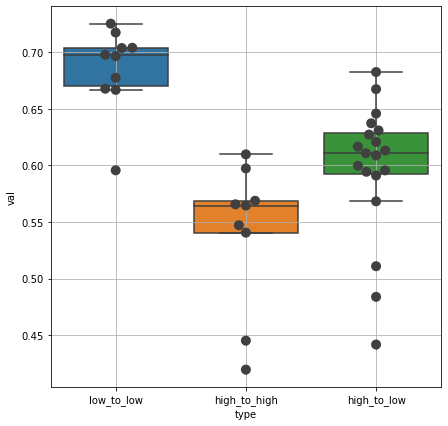

In [212]:
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.boxplot(x="type", y="val", data=all_val, ax=ax, order=order)
ax = sns.swarmplot(
    x="type", y="val", data=all_val, color=".25", ax=ax, size=10, order=order
)
ax.grid()

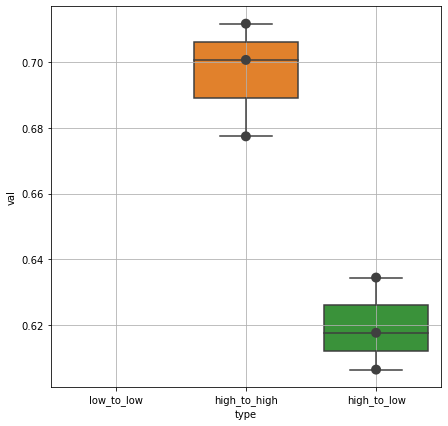

In [192]:
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.boxplot(x="type", y="val", data=all_val, ax=ax, order=order)
ax = sns.swarmplot(
    x="type", y="val", data=all_val, color=".25", ax=ax, size=10, order=order
)
ax.grid()

In [160]:
tikzplotlib.clean_figure()
print(tikzplotlib.get_tikz_code(figure=fig))

% This file was created by tikzplotlib v0.9.8.
\begin{tikzpicture}

\definecolor{color0}{rgb}{0.194607843137255,0.453431372549019,0.632843137254902}
\definecolor{color1}{rgb}{0.881862745098039,0.505392156862745,0.173039215686275}
\definecolor{color2}{rgb}{0.229411764705882,0.570588235294118,0.229411764705882}

\begin{axis}[
tick align=outside,
tick pos=left,
x grid style={white!69.0196078431373!black},
xlabel={type},
xmajorgrids,
xmin=-0.5, xmax=2.5,
xtick style={color=black},
xtick={0,1,2},
xticklabels={low\_to\_low,high\_to\_high,high\_to\_low},
y grid style={white!69.0196078431373!black},
ylabel={val},
ymajorgrids,
ymin=0.557834487441202, ymax=0.788408956301144,
ytick style={color=black},
ytick={0.55,0.6,0.65,0.7,0.75,0.8},
yticklabels={0.55,0.60,0.65,0.70,0.75,0.80}
]
\path [draw=white!23.921568627451!black, fill=color0, semithick]
(axis cs:-0.4,0.724462867767254)
--(axis cs:0.4,0.724462867767254)
--(axis cs:0.4,0.775285520828289)
--(axis cs:-0.4,0.775285520828289)
--(axis cs:-0.4,

<Figure size 432x288 with 0 Axes>